In [1]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython.display
import essentia
import essentia.standard as es
import librosa
import librosa.display
from collections import Counter
from utils import *
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

ImportError: No module named matplotlib

# K-means
[08-09/07/2017]

code in R:
library(cluster)
library(fpc)
read in csv
clus <- kmeans(data, centers = n_clusters)
plotcluster(data,clus$cluster)

In [3]:
drummer1 = pd.read_csv('heatmap_drummer1_allinstruments.csv')

IOError: File heatmap_drummer1_allinstruments.csv does not exist

In [167]:
drummer1_transpose = drummer1.T
drummer1_transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
1,2,0,2,7,2,11,7,5,1,8,9,28,4,9,11,6,5,4,5,3,...
2,0,0,2,0,2,2,3,2,2,2,2,2,1,5,2,6,2,1,3,0,...
3,2,0,2,4,6,6,7,5,5,6,4,3,5,11,3,10,4,3,1,3,...
4,0,1,4,0,3,0,0,0,1,2,1,1,2,0,1,0,1,1,3,2,...
5,0,0,2,5,10,10,11,12,15,6,7,3,3,13,14,12,8,1,1,1,...
6,0,3,0,0,0,0,4,0,1,2,0,1,0,1,0,0,2,2,6,5,...
7,1,1,3,6,5,8,9,3,8,2,3,4,1,7,8,10,4,0,4,4,...
8,0,3,2,1,4,1,4,3,2,0,0,0,0,2,1,2,1,3,4,3,...
9,0,1,0,7,8,4,11,12,10,5,8,8,5,8,10,9,8,1,6,3,...
10,1,2,0,2,2,4,5,5,5,1,3,1,5,3,5,0,2,0,5,5,...


In [128]:
kmeans = KMeans(n_clusters=4).fit(drummer1_transpose)
print kmeans.labels_

In [163]:
drummer1_bass = pd.read_csv('heatmap_drummers123_allinstruments.csv').T

Silhouette analysis can be used to study the separation distance between the resulting clusters. 

In [165]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,16]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(drummer1_bass)
    silhouette_avg = silhouette_score(drummer1_bass, cluster_labels)
    print n_clusters
    print cluster_labels
    #print clusterer.predict(a)
    print("For n_clusters=", n_clusters, "Thee average silhouette score is:", silhouette_avg)

2
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1]
('For n_clusters=', 2, 'Thee average silhouette score is:', 0.40365256540841671)
3
[0 2 2 2 0 2 2 2 0 2 2 2 0 2 2 2 1 2 0 2 1 2 0 2 1 2 0 2 1 2 0 2 1 0 0 0 1
 0 0 0 1 0 0 0 1 0 0 0]
('For n_clusters=', 3, 'Thee average silhouette score is:', 0.25412328047328292)
4
[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 1 0 0 0 3 2 0 0 3 0 3 0 1 0 0 0 1 0 3 0 3
 0 3 0 3 0 3 0 1 0 3 0]
('For n_clusters=', 4, 'Thee average silhouette score is:', 0.2258208110818154)
5
[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 2 0 0 0 1 0 0 0 1 0 1 0 2 0 0 0 2 0 1 0 3
 0 1 0 3 0 1 0 3 0 1 0]
('For n_clusters=', 5, 'Thee average silhouette score is:', 0.227175542667965)
6
[5 0 4 0 1 0 4 0 4 0 4 0 5 0 4 0 3 4 1 4 2 4 1 4 2 4 1 4 3 4 1 4 3 1 1 1 2
 1 1 1 2 1 2 1 2 1 2 1]
('For n_clusters=', 6, 'Thee average silhouette score is:', 0.21471204938563324)
7
[0 4 1 4 1 4 1 4 1 4 1 4 0 4 1 4 5 1 0 1 2 1 0 1 2 1 2 1 5 1 0 1 3 0 2 0 6
 0 2 0 6 0 2 0 6

In [186]:
X = pd.read_csv('heatmap_drummer1_noindex.csv').T
X = X.as_matrix()

In [198]:
db = DBSCAN(eps=10, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

2

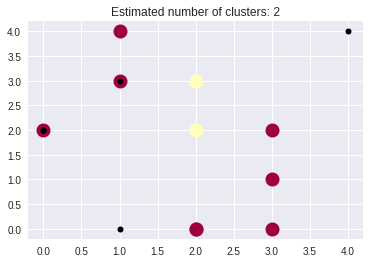

In [199]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Dimensionality reduction

princomp:
x<-read.csv(filename)
princomp(x)
summary(princomp(x))
biplot(princomp(x))

/ how to do projection? only works for prcomp?

Rtsne = perplexity has to be low --- analytics blabla works

In [1]:
from sklearn.decomposition import PCA

In [16]:
x = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_allinstruments.csv')
y = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco.csv')

In [17]:
pca = PCA(n_components = 2).fit(x)

In [18]:
pca_plot = pca.transform(y) #apply dimensionality reduction to Y

In [21]:
pca.transform(x)

array([[-12.78869799,   2.72699204],
       [-11.24061706,   1.6397594 ],
       [ -8.72421719,   1.32656183],
       [  0.41021635,   0.27611354],
       [  2.20021672,  -6.95591266],
       [  7.19358835,   0.05311586],
       [  9.31242513,  -4.69041663],
       [  6.21540805,  -8.61858272],
       [  3.452215  ,  -9.93865177],
       [  3.22730033,   3.06206689],
       [  4.19214653,   4.24118459],
       [ 19.32105793,  24.13751516],
       [ -3.12300021,   1.47862514],
       [ 14.84975856,  -8.66850657],
       [ 11.18025206,  -2.50802892],
       [  7.57504263,  -4.47249221],
       [  2.72086123,  -2.04715465],
       [ -5.50087267,   4.11591137],
       [ -5.95500891,  -0.25353224],
       [ -7.70565129,   0.11400716],
       [-12.20327936,  -0.05510254],
       [-12.58151129,   0.05437503],
       [-12.02763292,   4.98215291]])

In [25]:
pca.transform(y)

array([-14.81939357,   1.88556009])

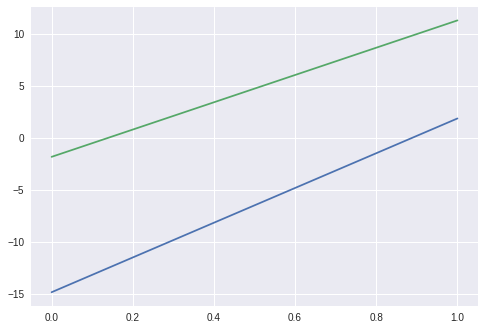

In [28]:
plt.plot(pca.transform(y)[2])
plt.plot(pca.transform(y)[11])

# CLASSIFICATION

SVM for genres

In [50]:
from sklearn import svm
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix
import itertools
from sklearn import preprocessing

In [100]:
######################### READ DATA ##################################
drummer1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_allinstruments.csv')
drummer2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_allinstruments.csv')
drummer3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_allinstruments_fasterbeat.csv')
disco_drummer1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco.csv')
disco_drummer2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco.csv')
disco_drummer3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_allinstruments_disco.csv')
rock_drummer1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock.csv')
rock_drummer2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock.csv')
rock_drummer3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock.csv')
disco = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco.csv')
disco1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_1.csv')
disco2 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_2.csv')
disco3 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_3.csv')
disco4 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_4.csv')
disco5 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_5.csv')
disco6 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_6.csv')

rock1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_1.csv')
rock2 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_2.csv')
rock3 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_3.csv')
rock4 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_4.csv')
rock5 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_5.csv')
rock6 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_6.csv')

drummer1_bass =pd.read_csv('heatmaps/drummer1/heatmap_drummer1_bass.csv')
drummer1_hihat = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_hihat.csv')
drummer2_bass = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_bass.csv')
drummer2_hihat =pd.read_csv('heatmaps/drummer2/heatmap_drummer2_hihat.csv')
drummer3_bass = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_bass.csv')
drummer3_hihat =pd.read_csv('heatmaps/drummer3/heatmap_drummer3_hihat.csv') 
drummer1_cymbal = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_cymbals.csv')
drummer1_snare = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_snare.csv')
drummer2_cymbal = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_cymbals.csv')
drummer2_snare = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_snare.csv')
drummer3_cymbal = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_cymbals.csv')
drummer3_snare = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_snare.csv')

drummer2_disco1 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco1.csv')
drummer2_disco2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco2.csv')
drummer2_disco3 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco3.csv')
drummer2_disco4 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco4.csv')
drummer2_disco5 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco5.csv')
drummer2_disco6 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco6.csv')

drummer3_disco1 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco1.csv')
drummer3_disco2 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco2.csv')
drummer3_disco3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco3.csv')
drummer3_disco4 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco4.csv')
drummer3_disco5 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco5.csv')
drummer3_disco6 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco6.csv')

drummer2_rock1 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock1.csv')
drummer2_rock2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock2.csv')
drummer2_rock3 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock3.csv')
drummer2_rock4 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock4.csv')
drummer2_rock5 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock5.csv')
drummer2_rock6 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock6.csv')

drummer3_rock1 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock1.csv')
drummer3_rock2 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock2.csv')
drummer3_rock3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock3.csv')
drummer3_rock4 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock4.csv')
drummer3_rock5 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock5.csv')
drummer3_rock6 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock6.csv')

drummer1 = pd.DataFrame.transpose(drummer1)
drummer2 = pd.DataFrame.transpose(drummer2)
drummer3 = pd.DataFrame.transpose(drummer3)
disco_drummer1 = pd.DataFrame.transpose(disco_drummer1)
disco_drummer2 = pd.DataFrame.transpose(disco_drummer2)
disco_drummer3 = pd.DataFrame.transpose(disco_drummer3)
rock_drummer1 = pd.DataFrame.transpose(rock_drummer1)
rock_drummer2 = pd.DataFrame.transpose(rock_drummer2)
rock_drummer3 = pd.DataFrame.transpose(rock_drummer3)
drummer1_bass = pd.DataFrame.transpose(drummer1_bass)
drummer2_bass = pd.DataFrame.transpose(drummer2_bass)
drummer3_bass = pd.DataFrame.transpose(drummer3_bass)
drummer1_hihat = pd.DataFrame.transpose(drummer1_hihat)
drummer2_hihat = pd.DataFrame.transpose(drummer2_hihat)
drummer3_hihat = pd.DataFrame.transpose(drummer3_hihat)
drummer1_cymbal = pd.DataFrame.transpose(drummer1_cymbal)
drummer2_cymbal = pd.DataFrame.transpose(drummer2_cymbal)
drummer3_cymbal = pd.DataFrame.transpose(drummer3_cymbal)
drummer1_snare = pd.DataFrame.transpose(drummer1_snare)
drummer2_snare = pd.DataFrame.transpose(drummer2_snare)
drummer3_snare = pd.DataFrame.transpose(drummer3_snare)


disco1 = pd.DataFrame.transpose(disco1)
disco2 = pd.DataFrame.transpose(disco2)
disco3 = pd.DataFrame.transpose(disco3)
disco4 = pd.DataFrame.transpose(disco4)
disco5 = pd.DataFrame.transpose(disco5)
disco6 = pd.DataFrame.transpose(disco6)
disco = pd.DataFrame.transpose(disco)
rock = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock.csv')
rock1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_1.csv')
rock2 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_2.csv')
rock3 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_3.csv')
rock4 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_4.csv')
rock5 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_5.csv')
rock6 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_6.csv')
rock1 = pd.DataFrame.transpose(rock1)
rock2 = pd.DataFrame.transpose(rock2)
rock3 = pd.DataFrame.transpose(rock3)
rock4 = pd.DataFrame.transpose(rock4)
rock5 = pd.DataFrame.transpose(rock5)
rock6 = pd.DataFrame.transpose(rock6)
rock = pd.DataFrame.transpose(rock)

drummer2_disco1 = pd.DataFrame.transpose(drummer2_disco1)
drummer2_disco2 = pd.DataFrame.transpose(drummer2_disco2)
drummer2_disco3 = pd.DataFrame.transpose(drummer2_disco3)
drummer2_disco4 = pd.DataFrame.transpose(drummer2_disco4)
drummer2_disco5 = pd.DataFrame.transpose(drummer2_disco5)
drummer2_disco6 = pd.DataFrame.transpose(drummer2_disco6)
drummer2_rock1 = pd.DataFrame.transpose(drummer2_rock1)
drummer2_rock2 = pd.DataFrame.transpose(drummer2_rock2)
drummer2_rock3 = pd.DataFrame.transpose(drummer2_rock3)
drummer2_rock4 = pd.DataFrame.transpose(drummer2_rock4)
drummer2_rock5 = pd.DataFrame.transpose(drummer2_rock5)
drummer2_rock6 = pd.DataFrame.transpose(drummer2_rock6)

drummer3_disco1 = pd.DataFrame.transpose(drummer3_disco1)
drummer3_disco2 = pd.DataFrame.transpose(drummer3_disco2)
drummer3_disco3 = pd.DataFrame.transpose(drummer3_disco3)
drummer3_disco4 = pd.DataFrame.transpose(drummer3_disco4)
drummer3_disco5 = pd.DataFrame.transpose(drummer3_disco5)
drummer3_disco6 = pd.DataFrame.transpose(drummer3_disco6)
drummer3_rock1 = pd.DataFrame.transpose(drummer3_rock1)
drummer3_rock2 = pd.DataFrame.transpose(drummer3_rock2)
drummer3_rock3 = pd.DataFrame.transpose(drummer3_rock3)
drummer3_rock4 = pd.DataFrame.transpose(drummer3_rock4)
drummer3_rock5 = pd.DataFrame.transpose(drummer3_rock5)
drummer3_rock6 = pd.DataFrame.transpose(drummer3_rock6)

########## Scaling ############
#disco = disco.append(rock)
#disco = preprocessing.scale(disco)
#disco1 = preprocessing.scale(disco1)
#disco2 = preprocessing.scale(disco2)
#disco3 = preprocessing.scale(disco3)
#disco4 = preprocessing.scale(disco4)
#disco5 = preprocessing.scale(disco5)
#disco6 = preprocessing.scale(disco6)

#rock = preprocessing.scale(rock)
#rock1 = preprocessing.scale(rock1)
#rock2 = preprocessing.scale(rock2)
#rock3 = preprocessing.scale(rock3)
#rock4 = preprocessing.scale(rock4)
#rock5 = preprocessing.scale(rock5)
#rock6 = preprocessing.scale(rock6)

In [44]:
########## Normalisation ############
# X_normalized = preprocessing.normalize(X, norm='l2')

disco = preprocessing.normalize(disco)
disco1 = preprocessing.normalize(disco1)
disco2 = preprocessing.normalize(disco2)
disco3 = preprocessing.normalize(disco3)
disco4 = preprocessing.normalize(disco4)
disco5 = preprocessing.normalize(disco5)
disco6 = preprocessing.normalize(disco6)

#rock = preprocessing.normalize(rock)
rock1 = preprocessing.normalize(rock1)
rock2 = preprocessing.normalize(rock2)
rock3 = preprocessing.normalize(rock3)
rock4 = preprocessing.normalize(rock4)
rock5 = preprocessing.normalize(rock5)
rock6 = preprocessing.normalize(rock6)

#### instruments #####
drummer1_hihat = preprocessing.normalize(drummer1_hihat)
drummer2_hihat = preprocessing.normalize(drummer2_hihat)
drummer3_hihat = preprocessing.normalize(drummer3_hihat)
drummer1_bass = preprocessing.normalize(drummer1_bass)
drummer2_bass = preprocessing.normalize(drummer2_bass)
drummer3_bass = preprocessing.normalize(drummer3_bass)
drummer1_snare = preprocessing.normalize(drummer1_snare)
drummer2_snare = preprocessing.normalize(drummer2_snare)
drummer3_snare = preprocessing.normalize(drummer3_snare)
drummer1_cymbal = preprocessing.normalize(drummer1_cymbal)
drummer2_cymbal = preprocessing.normalize(drummer2_cymbal)
drummer3_cymbal = preprocessing.normalize(drummer3_cymbal)
hihat = preprocessing.normalize(hihat)

In [84]:
#labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']
#labels = ['2','3','4','6','7','8','10','11','12','14','15','16']
#labels = ['2','4','6','8','10','12','14','16']
#labels = ['1','3','5','7','9','11','13','15']
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
for label in labels:
    drummer3_hihat = drummer3_hihat.drop(label)
    drummer3_bass = drummer3_bass.drop(label)
    drummer3_snare = drummer3_snare.drop(label)
    drummer3_cymbal = drummer3_cymbal.drop(label)
    


#disco = disco.append(rock)

In [77]:
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']

for label in labels:
    drummer1_hihat = drummer1_hihat.drop(label)
    drummer2_hihat = drummer2_hihat.drop(label)
    drummer3_hihat = drummer3_hihat.drop(label)
    drummer1_bass = drummer1_bass.drop(label)
    drummer2_bass = drummer2_bass.drop(label)
    drummer3_bass = drummer3_bass.drop(label)
    drummer1_snare = drummer1_snare.drop(label)
    drummer2_snare = drummer2_snare.drop(label)
    drummer3_snare = drummer3_snare.drop(label)
    drummer1_cymbal = drummer1_cymbal.drop(label)
    drummer2_cymbal = drummer2_cymbal.drop(label)
    drummer3_cymbal = drummer3_cymbal.drop(label)


In [679]:
#labels = ['2','4','5','6','7','8','9','10','13','14','15','16']

for label in labels:
    drummer2 = drummer2.drop(label)
for label in labels:
    drummer3 = drummer3.drop(label)

In [680]:
variables = [disco1, disco2,disco3,disco4,disco5,disco6, rock1, rock2, rock3, rock4, rock5, rock6, drummer2_disco1,drummer2_disco2,drummer2_disco3,drummer2_disco4,drummer2_disco5,drummer2_disco6,drummer2_rock1,drummer2_rock2,drummer2_rock3,drummer2_rock4,drummer2_rock5,drummer2_rock6,drummer3_disco1,drummer3_disco2,drummer3_disco3,drummer3_disco4,drummer3_disco5,drummer3_disco6,drummer3_rock1,drummer3_rock2,drummer3_rock3,drummer3_rock4,drummer3_rock5,drummer3_rock6]
for label in labels:
    disco1 = disco1.drop(label)
#for label in labels:    
    disco2 = disco2.drop(label)
    disco3 = disco3.drop(label)
    disco4 = disco4.drop(label)
    disco5 = disco5.drop(label)
    disco6 = disco6.drop(label)
    rock1 = rock1.drop(label)
    rock2 = rock2.drop(label)
    rock3 = rock3.drop(label)
    rock4 = rock4.drop(label)
    rock5 = rock5.drop(label)
    rock6 = rock6.drop(label)
    drummer2_disco1 = drummer2_disco1.drop(label)
    drummer2_disco2 = drummer2_disco2.drop(label)
    drummer2_disco3 = drummer2_disco3.drop(label)
    drummer2_disco4 = drummer2_disco4.drop(label)
    drummer2_disco5 = drummer2_disco5.drop(label)
    drummer2_disco6 = drummer2_disco6.drop(label)
    drummer3_disco1 = drummer3_disco1.drop(label)
    drummer3_disco2 = drummer3_disco2.drop(label)
    drummer3_disco3 = drummer3_disco3.drop(label)
    drummer3_disco4 = drummer3_disco4.drop(label)
    drummer3_disco5 = drummer3_disco5.drop(label)
    drummer3_disco6 = drummer3_disco6.drop(label)
    
    drummer2_rock1 = drummer2_rock1.drop(label)
    drummer2_rock2 = drummer2_rock2.drop(label)
    drummer2_rock3 = drummer2_rock3.drop(label)
    drummer2_rock4 = drummer2_rock4.drop(label)
    drummer2_rock5 = drummer2_rock5.drop(label)
    drummer2_rock6 = drummer2_rock6.drop(label)
    drummer3_rock1 = drummer3_rock1.drop(label)
    drummer3_rock2 = drummer3_rock2.drop(label)
    drummer3_rock3 = drummer3_rock3.drop(label)
    drummer3_rock4 = drummer3_rock4.drop(label)
    drummer3_rock5 = drummer3_rock5.drop(label)
    drummer3_rock6 = drummer3_rock6.drop(label)

In [682]:
#################### drop outer micro-timing deviations ##########################
labels = [0, 1, 2, 3, 4, 17, 18, 19, 20, 21]

disco1 = disco1.drop(labels,1)
disco2= disco2.drop(labels,1)
disco3 = disco3.drop(labels,1)
disco4 = disco4.drop(labels,1)
disco5 = disco5.drop(labels,1)
disco6 = disco6.drop(labels,1)
rock = rock.drop(labels,1)
rock1 = rock1.drop(labels,1)
rock2 = rock2.drop(labels,1)
rock3 = rock3.drop(labels,1)
rock4 = rock4.drop(labels,1)
rock5 = rock5.drop(labels,1)
rock6 = rock6.drop(labels,1)
drummer1 = drummer1.drop(labels,1)
drummer2 = drummer2.drop(labels,1)
drummer3 = drummer3.drop(labels,1)

drummer2_disco1 = drummer2_disco1.drop(labels,1)
drummer2_disco2 = drummer2_disco2.drop(labels,1)
drummer2_disco3 = drummer2_disco3.drop(labels,1)
drummer2_disco4 = drummer2_disco4.drop(labels,1)
drummer2_disco5 = drummer2_disco5.drop(labels,1)
drummer2_disco6 = drummer2_disco6.drop(labels,1)
drummer3_disco1 = drummer3_disco1.drop(labels,1)
drummer3_disco2 = drummer3_disco2.drop(labels,1)
drummer3_disco3 = drummer3_disco3.drop(labels,1)
drummer3_disco4 = drummer3_disco4.drop(labels,1)
drummer3_disco5 = drummer3_disco5.drop(labels,1)
drummer3_disco6 = drummer3_disco6.drop(labels,1)

drummer2_rock1 = drummer2_rock1.drop(labels,1)
drummer2_rock2 = drummer2_rock2.drop(labels,1)
drummer2_rock3 = drummer2_rock3.drop(labels,1)
drummer2_rock4 = drummer2_rock4.drop(labels,1)
drummer2_rock5 = drummer2_rock5.drop(labels,1)
drummer2_rock6 = drummer2_rock6.drop(labels,1)
drummer3_rock1 = drummer3_rock1.drop(labels,1)
drummer3_rock2 = drummer3_rock2.drop(labels,1)
drummer3_rock3 = drummer3_rock3.drop(labels,1)
drummer3_rock4 = drummer3_rock4.drop(labels,1)
drummer3_rock5 = drummer3_rock5.drop(labels,1)
drummer3_rock6 = drummer3_rock6.drop(labels,1)

In [698]:
drummer1 = drummer1.append(drummer2)
drummer1 = drummer1.append(drummer3)

In [743]:
drummer3_rock1 = drummer3_rock1.append(drummer3_rock2)
drummer3_rock1 = drummer3_rock1.append(drummer3_rock3)

In [101]:
hihat = drummer1_hihat.append(drummer3_hihat)
bass = drummer1_bass.append(drummer3_bass)
snare = drummer1_snare.append(drummer3_snare)
cymbals = drummer1_cymbal.append(drummer3_cymbal)
hihat = hihat.append(bass)
hihat = hihat.append(snare)
hihat = hihat.append(cymbals)

In [102]:
############## TRAINING SET #####################

n_samples = 128
half_samples = n_samples/2
third_samples = n_samples/3
fourth_samples = n_samples/4
y = np.empty(n_samples)
#for i in range(n_samples/2):
#    y[i] = 1
#for i in range(n_samples/2):
#    y[i+half_samples] = 2   
#for i in range(n_samples/3):
#    y[i] = 1
#for i in range(n_samples/3):
#    y[i+third_samples] = 2
#for i in range(n_samples/3):
#    y[i+2*third_samples] = 3
for i in range(n_samples/4):
    y[i] = 1
for i in range(n_samples/4):
    y[i+fourth_samples] = 2
for i in range(n_samples/4):
    y[i+2*fourth_samples] = 3
for i in range(n_samples/4):
    y[i+3*fourth_samples] = 4

y.astype(int)

y_test_disco = np.empty(16)
y_test_rock = np.empty(16)
y_test_three = np.empty(16)
y_test_four = np.empty(16)

for i in range(16):
    y_test_disco[i] = 1
for i in range(16):
    y_test_rock[i] = 2
for i in range(16):
    y_test_three[i] = 3
for i in range(16):
    y_test_four[i] = 4

In [92]:
y

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
        3.,  3.,  3.,  3.,  3.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.])

In [103]:
############# SUPPORT VECTOR MACHINES ###############
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVC(kernel=kernel) # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ --- C ---- gamma
    clf.fit(hihat,y)
    print kernel
    print '-'
    print clf.score(drummer2_hihat, y_test_disco)
    #print clf.predict(drummer1_hihat)
    print clf.score(drummer2_bass, y_test_rock)
    #print clf.predict(drummer1_bass)
    print clf.score(drummer2_snare, y_test_three)
    #print clf.predict(drummer1_snare)
    print clf.score(drummer2_cymbal, y_test_four)
    #print clf.predict(drummer1_cymbal)
    
    y_pred1 = clf.predict(drummer2_hihat)
    cnf_matrix1 = confusion_matrix(y_test_disco, y_pred1)
    y_pred2 = clf.predict(drummer2_bass)
    cnf_matrix2 = confusion_matrix(y_test_rock, y_pred2)
    y_pred3 = clf.predict(drummer2_snare)
    cnf_matrix3 = confusion_matrix(y_test_three, y_pred3)
    y_pred4 = clf.predict(drummer2_cymbal)
    cnf_matrix4 = confusion_matrix(y_test_four, y_pred4)
    
    title1 = str(kernel) + '_' + 'drummer2_hihat_CNF'
    plot_confusion_matrix(cnf_matrix1, classes=['hihat','bass','snare','cymbals'],
                      title=title1)
    save_fig_link = 'machinelearning/instrument_classification/' + str(kernel) + '_' + 'drummer2_hihat_CNF'
    plt.savefig(save_fig_link, format="jpg")
    plt.close()
    
    title2 = str(kernel) + '_' + 'drummer2_bass_CNF'
    plot_confusion_matrix(cnf_matrix2, classes=['hihat','bass','snare','cymbals'],
                      title=title2)
    save_fig_link = 'machinelearning/instrument_classification/' + str(kernel) + '_' + 'drummer2_bass_CNF'
    plt.savefig(save_fig_link, format="jpg")
    plt.close()

    title3 = str(kernel) + '_' + 'drummer2_snare_CNF'
    plot_confusion_matrix(cnf_matrix3, classes=['hihat','bass','snare','cymbals'],
                      title=title3)
    save_fig_link = 'machinelearning/instrument_classification/'  +str(kernel) + '_' + 'drummer2_snare_CNF'
    plt.savefig(save_fig_link, format="jpg")
    plt.close()
    
    title4 = str(kernel) + '_' + 'drummer2_cymbals_CNF'
    plot_confusion_matrix(cnf_matrix4, classes=['hihat','bass','snare','cymbals'],
                      title=title4)
    save_fig_link = 'machinelearning/instrument_classification/' + str(kernel) + '_' + 'drummer2_cymbals_CNF'
    plt.savefig(save_fig_link, format="jpg")
    plt.close()

linear
-
0.6875
0.25
0.125
0.0625
poly
-
0.375
0.4375
0.1875
0.0625
rbf
-
0.5625
0.3125
0.3125
0.3125
sigmoid
-
0.1875
0.0625
0.75
0.5


In [27]:
##### RESULTATER FORT, NITT LOESCHEN #####


############# SUPPORT VECTOR MACHINES ###############
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = svm.SVC(kernel=kernel) # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’ --- C ---- gamma
    clf.fit(drummer1,y)
    i = 1
    print kernel
    print '-'
    for var in [disco1, disco2,disco3,disco4,disco5,disco6, rock1, rock2, rock3, rock4, rock5, rock6]:
        print clf.score(var, y_test_disco)

        #y_pred = clf.predict(var)
        #cnf_matrix = confusion_matrix(y_test_disco, y_pred)
        #title = str(kernel) + '_' + 'classifier_discorock_' + 'disco' + str(i)
        #plot_confusion_matrix(cnf_matrix, classes=['disco','rock'],
        #                  title=title)
        #save_fig_link = 'heatmaps/' + str(kernel) + '_' + 'classifier_discorock-minusMD-x10_' + 'disco' + str(i)
        #plt.savefig(save_fig_link, format="jpg")
        #plt.close()
        i += 1
        
    i = 1
    for var in [drummer2_disco1,drummer2_disco2,drummer2_disco3,drummer2_disco4,drummer2_disco5,drummer2_disco6,drummer2_rock1,drummer2_rock2,drummer2_rock3,drummer2_rock4,drummer2_rock5,drummer2_rock6]:
        print clf.score(var, y_test_rock)

        #y_pred = clf.predict(var)
        #cnf_matrix = confusion_matrix(y_test_rock, y_pred)
        #title = str(kernel) + '_' + 'classifier_discorock_' + 'rock' + str(i)
        #plot_confusion_matrix(cnf_matrix, classes=['disco','rock'],
        #                  title=title)
        #save_fig_link = 'heatmaps/' + str(kernel) + '_' + 'classifier_discorock-minusMD-x10_' + 'rock' + str(i)
        #plt.savefig(save_fig_link, format = "jpg")
        #plt.close()
        i += 1
    i = 1 
    for var in [drummer3_disco1,drummer3_disco2,drummer3_disco3,drummer3_disco4,drummer3_disco5,drummer3_disco6,drummer3_rock1,drummer3_rock2,drummer3_rock3,drummer3_rock4,drummer3_rock5,drummer3_rock6]:
        print clf.score(var, y_test_three)

        #y_pred = clf.predict(var)
        #cnf_matrix = confusion_matrix(y_test_rock, y_pred)
        #title = str(kernel) + '_' + 'classifier_discorock_' + 'rock' + str(i)
        #plot_confusion_matrix(cnf_matrix, classes=['disco','rock'],
        #                  title=title)
        #save_fig_link = 'heatmaps/' + str(kernel) + '_' + 'classifier_discorock-minusMD-x10_' + 'rock' + str(i)
        #plt.savefig(save_fig_link, format = "jpg")
        #plt.close()
        i += 1

linear
-


ValueError: Found input variables with inconsistent numbers of samples: [4, 16]

In [365]:
clf.predict(rock6)

array([ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
        2.,  2.,  2.])

In [401]:
y_test_disco = np.empty(16)
y_test_rock = np.empty(16)
for i in range(16):
    y_test_disco[i] = 1
for i in range(16):
    y_test_rock[i] = 2

In [402]:
y_test_disco = y_test_disco.astype(int)
y_test_rock = y_test_rock.astype(int)

[[16]]
[[16]]
[[16]]
[[16]]
[[7 9]
 [0 0]]
[[14  2]
 [ 0  0]]


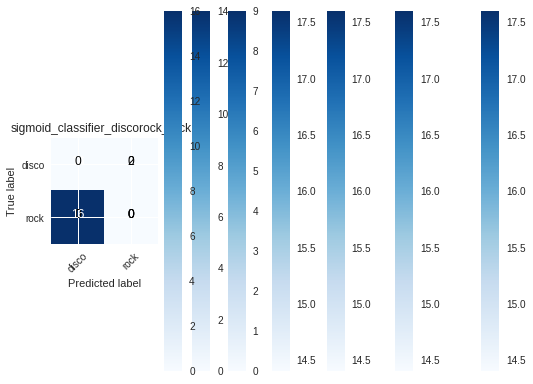

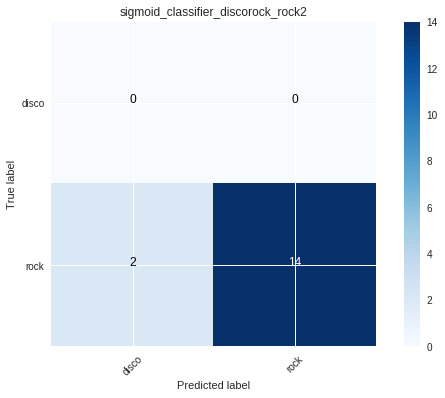

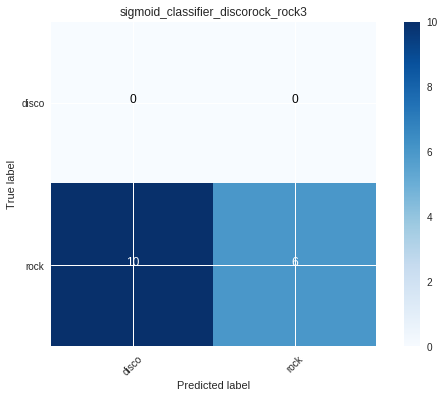

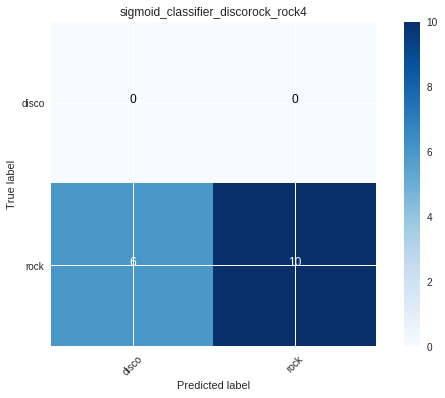

KeyboardInterrupt: 

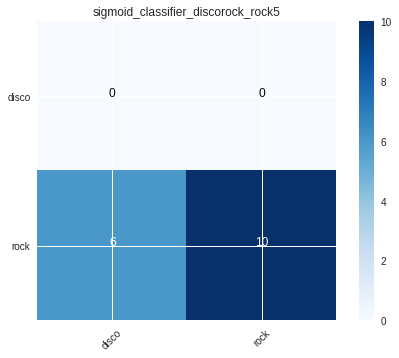

In [403]:
i = 1
for var in [disco1,disco2,disco3,disco4,disco5,disco6]:
    y_pred = clf.predict(var)
    cnf_matrix = confusion_matrix(y_test_disco, y_pred)
    print cnf_matrix
    title = str(kernel) + '_' + 'classifier_discorock_' + 'disco' + str(i)
    plot_confusion_matrix(cnf_matrix, classes=['disco','rock'],
                      title=title)
    save_fig_link = 'heatmaps/' + str(kernel) + '_' + 'classifier_discorock_' + 'disco' + str(i) + 'jpg'
    plt.savefig(save_fig_link)
    i += 1
    
i = 1
for var in [rock1,rock2,rock3,rock4,rock5,rock6]:
    y_pred = clf.predict(var)
    cnf_matrix = confusion_matrix(y_test_rock, y_pred)
    title = str(kernel) + '_' + 'classifier_discorock_' + 'rock' + str(i)
    plot_confusion_matrix(cnf_matrix, classes=['disco','rock'],
                      title=title)
    plt.show()
    save_fig_link = 'heatmaps/' + str(kernel) + '_' + 'classifier_discorock_' + 'rock' + str(i) + 'jpg'
    plt.savefig(save_fig_link)
    i += 1

In [270]:
cnf_matrix

array([[16]])

Confusion matrix, without normalization
[[16]]


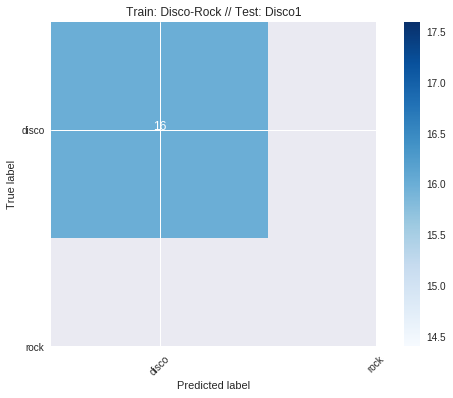

In [271]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['disco','rock'],
                      title='Train: Disco-Rock // Test: Disco1')
plt.show()

In [208]:
rock1 = rock1.drop(0, 1)
rock1 = rock1.drop(21, 1)
rock2 = rock2.drop(0, 1)
rock2 = rock2.drop(21, 1)
rock3 = rock3.drop(0, 1)
rock3 = rock3.drop(21, 1)

In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Nearest Neighbour

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
######################### READ DATA ##################################
drummer1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_allinstruments.csv')
drummer2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_allinstruments.csv')
drummer3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_allinstruments_fasterbeat.csv')
disco_drummer1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco.csv')
disco_drummer2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco.csv')
disco_drummer3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_allinstruments_disco.csv')
rock_drummer1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock.csv')
rock_drummer2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock.csv')
rock_drummer3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock.csv')
disco = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco.csv')
disco1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_1.csv')
disco2 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_2.csv')
disco3 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_3.csv')
disco4 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_4.csv')
disco5 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_5.csv')
disco6 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_disco_6.csv')

rock1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_1.csv')
rock2 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_2.csv')
rock3 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_3.csv')
rock4 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_4.csv')
rock5 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_5.csv')
rock6 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_6.csv')

drummer1_bass =pd.read_csv('heatmaps/drummer1/heatmap_drummer1_bass.csv')
drummer1_hihat = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_hihat.csv')
drummer2_bass = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_bass.csv')
drummer2_hihat =pd.read_csv('heatmaps/drummer2/heatmap_drummer2_hihat.csv')
drummer3_bass = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_bass.csv')
drummer3_hihat =pd.read_csv('heatmaps/drummer3/heatmap_drummer3_hihat.csv') 
drummer1_cymbal = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_cymbals.csv')
drummer1_snare = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_snare.csv')
drummer2_cymbal = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_cymbals.csv')
drummer2_snare = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_snare.csv')
drummer3_cymbal = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_cymbals.csv')
drummer3_snare = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_snare.csv')

drummer2_disco1 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco1.csv')
drummer2_disco2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco2.csv')
drummer2_disco3 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco3.csv')
drummer2_disco4 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco4.csv')
drummer2_disco5 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco5.csv')
drummer2_disco6 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_disco6.csv')

drummer3_disco1 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco1.csv')
drummer3_disco2 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco2.csv')
drummer3_disco3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco3.csv')
drummer3_disco4 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco4.csv')
drummer3_disco5 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco5.csv')
drummer3_disco6 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_disco6.csv')

drummer2_rock1 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock1.csv')
drummer2_rock2 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock2.csv')
drummer2_rock3 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock3.csv')
drummer2_rock4 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock4.csv')
drummer2_rock5 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock5.csv')
drummer2_rock6 = pd.read_csv('heatmaps/drummer2/heatmap_drummer2_rock6.csv')

drummer3_rock1 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock1.csv')
drummer3_rock2 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock2.csv')
drummer3_rock3 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock3.csv')
drummer3_rock4 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock4.csv')
drummer3_rock5 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock5.csv')
drummer3_rock6 = pd.read_csv('heatmaps/drummer3/heatmap_drummer3_rock6.csv')

drummer1 = pd.DataFrame.transpose(drummer1)
drummer2 = pd.DataFrame.transpose(drummer2)
drummer3 = pd.DataFrame.transpose(drummer3)
disco_drummer1 = pd.DataFrame.transpose(disco_drummer1)
disco_drummer2 = pd.DataFrame.transpose(disco_drummer2)
disco_drummer3 = pd.DataFrame.transpose(disco_drummer3)
rock_drummer1 = pd.DataFrame.transpose(rock_drummer1)
rock_drummer2 = pd.DataFrame.transpose(rock_drummer2)
rock_drummer3 = pd.DataFrame.transpose(rock_drummer3)
drummer1_bass = pd.DataFrame.transpose(drummer1_bass)
drummer2_bass = pd.DataFrame.transpose(drummer2_bass)
drummer3_bass = pd.DataFrame.transpose(drummer3_bass)
drummer1_hihat = pd.DataFrame.transpose(drummer1_hihat)
drummer2_hihat = pd.DataFrame.transpose(drummer2_hihat)
drummer3_hihat = pd.DataFrame.transpose(drummer3_hihat)
drummer1_cymbal = pd.DataFrame.transpose(drummer1_cymbal)
drummer2_cymbal = pd.DataFrame.transpose(drummer2_cymbal)
drummer3_cymbal = pd.DataFrame.transpose(drummer3_cymbal)
drummer1_snare = pd.DataFrame.transpose(drummer1_snare)
drummer2_snare = pd.DataFrame.transpose(drummer2_snare)
drummer3_snare = pd.DataFrame.transpose(drummer3_snare)

disco1 = pd.DataFrame.transpose(disco1)
disco2 = pd.DataFrame.transpose(disco2)
disco3 = pd.DataFrame.transpose(disco3)
disco4 = pd.DataFrame.transpose(disco4)
disco5 = pd.DataFrame.transpose(disco5)
disco6 = pd.DataFrame.transpose(disco6)
disco = pd.DataFrame.transpose(disco)
rock = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock.csv')
rock1 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_1.csv')
rock2 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_2.csv')
rock3 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_3.csv')
rock4 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_4.csv')
rock5 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_5.csv')
rock6 = pd.read_csv('heatmaps/drummer1/heatmap_drummer1_rock_6.csv')
rock1 = pd.DataFrame.transpose(rock1)
rock2 = pd.DataFrame.transpose(rock2)
rock3 = pd.DataFrame.transpose(rock3)
rock4 = pd.DataFrame.transpose(rock4)
rock5 = pd.DataFrame.transpose(rock5)
rock6 = pd.DataFrame.transpose(rock6)
rock = pd.DataFrame.transpose(rock)

drummer2_disco1 = pd.DataFrame.transpose(drummer2_disco1)
drummer2_disco2 = pd.DataFrame.transpose(drummer2_disco2)
drummer2_disco3 = pd.DataFrame.transpose(drummer2_disco3)
drummer2_disco4 = pd.DataFrame.transpose(drummer2_disco4)
drummer2_disco5 = pd.DataFrame.transpose(drummer2_disco5)
drummer2_disco6 = pd.DataFrame.transpose(drummer2_disco6)
drummer2_rock1 = pd.DataFrame.transpose(drummer2_rock1)
drummer2_rock2 = pd.DataFrame.transpose(drummer2_rock2)
drummer2_rock3 = pd.DataFrame.transpose(drummer2_rock3)
drummer2_rock4 = pd.DataFrame.transpose(drummer2_rock4)
drummer2_rock5 = pd.DataFrame.transpose(drummer2_rock5)
drummer2_rock6 = pd.DataFrame.transpose(drummer2_rock6)

drummer3_disco1 = pd.DataFrame.transpose(drummer3_disco1)
drummer3_disco2 = pd.DataFrame.transpose(drummer3_disco2)
drummer3_disco3 = pd.DataFrame.transpose(drummer3_disco3)
drummer3_disco4 = pd.DataFrame.transpose(drummer3_disco4)
drummer3_disco5 = pd.DataFrame.transpose(drummer3_disco5)
drummer3_disco6 = pd.DataFrame.transpose(drummer3_disco6)
drummer3_rock1 = pd.DataFrame.transpose(drummer3_rock1)
drummer3_rock2 = pd.DataFrame.transpose(drummer3_rock2)
drummer3_rock3 = pd.DataFrame.transpose(drummer3_rock3)
drummer3_rock4 = pd.DataFrame.transpose(drummer3_rock4)
drummer3_rock5 = pd.DataFrame.transpose(drummer3_rock5)
drummer3_rock6 = pd.DataFrame.transpose(drummer3_rock6)

In [34]:
#labels = ['1','3','5','7','9','11','13','15']
#labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
labels = ['2','3','4','5','6','7','8','9','10','11','12','13','14','15']



    

for label in labels:
    drummer1 = drummer1.drop(label)
    drummer2 = drummer2.drop(label)
    drummer3 = drummer3.drop(label)

    disco1 = disco1.drop(label)
#for label in labels:    
    disco2 = disco2.drop(label)
    disco3 = disco3.drop(label)
    disco4 = disco4.drop(label)
    disco5 = disco5.drop(label)
    disco6 = disco6.drop(label)
    rock1 = rock1.drop(label)
    rock2 = rock2.drop(label)
    rock3 = rock3.drop(label)
    rock4 = rock4.drop(label)
    rock5 = rock5.drop(label)
    rock6 = rock6.drop(label)
    drummer2_disco1 = drummer2_disco1.drop(label)
    drummer2_disco2 = drummer2_disco2.drop(label)
    drummer2_disco3 = drummer2_disco3.drop(label)
    drummer2_disco4 = drummer2_disco4.drop(label)
    drummer2_disco5 = drummer2_disco5.drop(label)
    drummer2_disco6 = drummer2_disco6.drop(label)
    drummer3_disco1 = drummer3_disco1.drop(label)
    drummer3_disco2 = drummer3_disco2.drop(label)
    drummer3_disco3 = drummer3_disco3.drop(label)
    drummer3_disco4 = drummer3_disco4.drop(label)
    drummer3_disco5 = drummer3_disco5.drop(label)
    drummer3_disco6 = drummer3_disco6.drop(label)
    
    drummer2_rock1 = drummer2_rock1.drop(label)
    drummer2_rock2 = drummer2_rock2.drop(label)
    drummer2_rock3 = drummer2_rock3.drop(label)
    drummer2_rock4 = drummer2_rock4.drop(label)
    drummer2_rock5 = drummer2_rock5.drop(label)
    drummer2_rock6 = drummer2_rock6.drop(label)
    drummer3_rock1 = drummer3_rock1.drop(label)
    drummer3_rock2 = drummer3_rock2.drop(label)
    drummer3_rock3 = drummer3_rock3.drop(label)
    drummer3_rock4 = drummer3_rock4.drop(label)
    drummer3_rock5 = drummer3_rock5.drop(label)
    drummer3_rock6 = drummer3_rock6.drop(label)

In [118]:
genres = drummer1.append(drummer2)
genres = genres.append(drummer3)

speed = disco1.append(rock4)
speed = speed.append(disco2)
speed = speed.append(rock5)
speed = speed.append(disco3)
speed = speed.append(rock6)

hihat = drummer2_hihat.append(drummer2_hihat)
bass = drummer2_bass.append(drummer2_bass)
snare = drummer2_snare.append(drummer2_snare)
cymbals = drummer2_cymbal.append(drummer2_cymbal)
hihat = hihat.append(bass)
hihat = hihat.append(snare)
hihat = hihat.append(cymbals)

In [112]:
hihat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,
1,0,1,0,3,3,6,4,5,5,6,8,23,9,17,9,4,4,4,1,1,...
2,0,0,2,1,3,2,0,1,3,1,1,4,0,5,3,3,3,3,3,0,...
3,3,1,1,3,2,4,8,5,2,9,4,3,7,6,20,5,0,3,1,1,...
4,2,0,0,0,0,1,0,1,2,0,1,1,1,2,5,1,3,2,3,3,...
5,1,1,3,1,5,2,4,9,4,8,6,7,5,7,8,2,1,2,2,3,...
6,0,0,1,0,0,1,3,2,0,1,2,0,2,3,2,2,4,4,1,1,...
7,2,2,1,1,3,8,2,5,4,11,3,6,4,14,14,4,1,2,1,3,...
8,1,0,1,1,4,0,0,2,1,1,0,1,0,1,1,1,3,7,0,3,...
9,0,0,1,4,3,4,8,4,6,9,8,12,8,10,10,3,5,1,2,2,...
10,1,1,2,0,1,0,2,5,2,3,1,1,2,5,6,1,4,1,1,2,...


In [113]:
############## LABELS TRAINING SET #####################

n_samples = 128
half_samples = n_samples/2
third_samples = n_samples/3
fourth_samples = n_samples/4
y = np.empty(n_samples)
#for i in range(n_samples/2):
#    y[i] = 1
#for i in range(n_samples/2):
#    y[i+half_samples] = 2   
#for i in range(n_samples/3):
#    y[i] = 1
#for i in range(n_samples/3):
#    y[i+third_samples] = 2
#for i in range(n_samples/3):
#    y[i+2*third_samples] = 3
for i in range(n_samples/4):
    y[i] = 1
for i in range(n_samples/4):
    y[i+fourth_samples] = 2
for i in range(n_samples/4):
    y[i+2*fourth_samples] = 3
for i in range(n_samples/4):
    y[i+3*fourth_samples] = 4

y.astype(int)

y_test_disco = np.empty(16)
y_test_rock = np.empty(16)
y_test_three = np.empty(16)
y_test_four = np.empty(16)

for i in range(16):
    y_test_disco[i] = 1
for i in range(16):
    y_test_rock[i] = 2
for i in range(16):
    y_test_three[i] = 3
for i in range(16):
    y_test_four[i] = 4

In [121]:
for kernel in ['ball_tree','kd_tree','brute']:
    neigh = KNeighborsClassifier(n_neighbors=2, algorithm=kernel) 
    neigh.fit(hihat,y)
    i = 1
    print kernel
#    print '-'
    #for var in [disco1]:
    #    print neigh.score(var, y_test_disco)
#for var in [disco1, disco2,disco3,disco4,disco5,disco6,drummer2_disco1,drummer2_disco2,drummer2_disco3,drummer2_disco4,drummer2_disco5,drummer2_disco6,drummer3_disco1,drummer3_disco2,drummer3_disco3,drummer3_disco4,drummer3_disco5,drummer3_disco6]:
    print neigh.score(drummer3_hihat, y_test_disco)
#for var in [rock1]:
#    print neigh.score(var, y_test_rock)
#for var in [drummer2_rock1, drummer2_rock2, drummer2_rock3,drummer2_rock4,drummer2_rock5,drummer2_rock6, drummer2_disco1,drummer2_disco2,drummer2_disco3,drummer2_disco4,drummer2_disco5, drummer2_disco6]:
    print neigh.score(drummer3_bass, y_test_rock)
#for var in [drummer3_rock1, drummer3_rock2,drummer3_rock3, drummer3_rock4, drummer3_rock5, drummer3_rock6,drummer3_disco1, drummer3_disco2, drummer3_disco3, drummer3_disco4, drummer3_disco5, drummer3_disco6]:
    print neigh.score(drummer3_snare, y_test_three)
    print neigh.score(drummer3_cymbal, y_test_four)

ball_tree
0.5625
0.375
0.0625
0.1875
kd_tree
0.5625
0.375
0.0625
0.1875
brute
0.5625
0.4375
0.0625
0.1875


In [122]:
##### RANDOM FOREST ##### 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5) 
forest.fit(hihat,y)

#for var in [disco1]:
#    print neigh.score(var, y_test_disco)
#for var in [disco1, disco2,disco3,disco4,disco5,disco6,drummer2_disco1,drummer2_disco2,drummer2_disco3,drummer2_disco4,drummer2_disco5,drummer2_disco6,drummer3_disco1,drummer3_disco2,drummer3_disco3,drummer3_disco4,drummer3_disco5,drummer3_disco6]:
print neigh.score(drummer3_hihat, y_test_disco)
#for var in [rock1]:
#    print neigh.score(var, y_test_rock)
#for var in [drummer2_rock1, drummer2_rock2, drummer2_rock3,drummer2_rock4,drummer2_rock5,drummer2_rock6, drummer2_disco1,drummer2_disco2,drummer2_disco3,drummer2_disco4,drummer2_disco5, drummer2_disco6]:
print neigh.score(drummer3_bass, y_test_rock)
#for var in [drummer3_rock1, drummer3_rock2,drummer3_rock3, drummer3_rock4, drummer3_rock5, drummer3_rock6,drummer3_disco1, drummer3_disco2, drummer3_disco3, drummer3_disco4, drummer3_disco5, drummer3_disco6]:
print neigh.score(drummer3_snare, y_test_three)
print neigh.score(drummer3_cymbal, y_test_four)

0.5625
0.4375
0.0625
0.1875


In [125]:
drummer1_prob = pd.read_csv('prob_distribution.csv')


In [126]:
drummer1_prob

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,100,1,0,2,0,0,0,1,0,0,2,0,0,1,0,0,7
1,90,0,0,0,4,0,10,1,8,1,3,2,3,3,5,2,7
2,80,1,4,2,15,1,0,3,5,0,0,3,8,3,0,2,2
3,70,5,0,4,0,4,0,6,3,5,3,5,6,4,0,4,7
4,60,1,4,7,11,7,0,5,11,6,3,8,11,4,5,6,2
5,50,8,4,7,0,7,0,9,3,3,7,7,0,6,7,6,5
6,40,5,7,8,0,8,13,10,11,9,8,7,3,6,10,7,2
7,30,4,4,5,0,9,0,3,8,9,8,10,6,3,10,8,11
8,20,1,4,5,4,11,3,9,5,8,8,4,6,3,2,6,5
9,10,6,4,7,7,4,6,2,0,4,2,6,3,7,5,5,5


In [139]:
print (drummer1_prob.loc[:,"Unnamed: 1"]) * 2

0      2
1      0
2      2
3     10
4      2
5     16
6     10
7      8
8      2
9     12
10    14
11    40
12     6
13    14
14    16
15     8
16     8
17     6
18     8
19     4
20     2
21     2
22     8
Name: Unnamed: 1, dtype: int64
